<a href="https://colab.research.google.com/github/Atefeh62/IBM-Data-Analyst-Capstone-Project-/blob/main/M3ExploratoryDataAnalysis_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis Lab**

# > Indented block




Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

Load the dataset into a dataframe.


In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df.shape

(11398, 85)

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


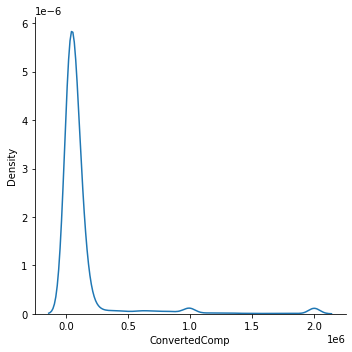

In [ ]:
sns.displot(df['ConvertedComp'], kind = "kde")


Plot the histogram for the column `ConvertedComp`.


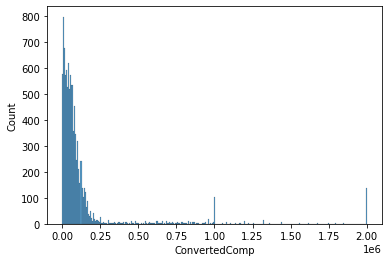

In [ ]:
sns.histplot(df["ConvertedComp"])


What is the median of the column `ConvertedComp`?


In [ ]:
df["ConvertedComp"].median()


57745.0

How many responders identified themselves only as a **Man**?


In [ ]:
(df["Gender"]=="Man").sum()

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [ ]:
df[df["Gender"]=="Woman"]["ConvertedComp"].median()


57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [ ]:
#print(df["Age"].describe())
print(" minimum age of respondents is : {}".format("16"))
print(" maximum age of respondants is : {}".format("99"))
print("first quarter age of respondant is : {}".format("25"))
print("the median age of respondants is : {}".format("29"))
print("the third quarter age of respondant is : {}".format("35"))

 minimum age of respondents is : 16
 maximum age of respondants is : 99
first quarter age of respondant is : 25
the median age of respondants is : 29
the third quarter age of respondant is : 35


Plot a histogram of the column `Age`.


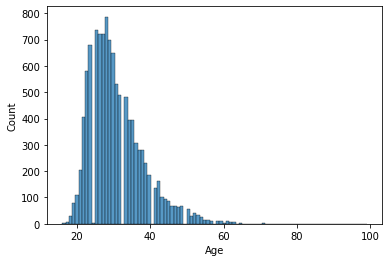

In [ ]:
sns.histplot(df["Age"])


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


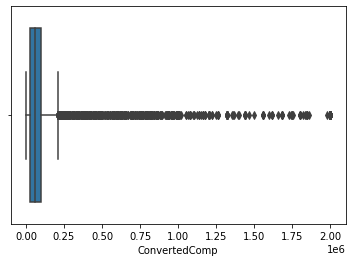

In [ ]:
sns.boxplot(df["ConvertedComp"])


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [ ]:
#df["ConvertedComp"].describe()
q1=2.686800e+04
q3=1.000000e+05
iqr = (q3 - q1)
iqr

73132.0

Find out the upper and lower bounds.


In [ ]:
print("Upperbound = {}".format(q1-1.5*iqr))
print("Lowerbound = {}".format(q3+1.5*iqr))

Upperbound = -82830.0
Lowerbound = 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [ ]:
outliers = df[df["ConvertedComp"] > q3+1.5*iqr]
print(type(outliers))
print(1 in outliers.index)
print(3 in outliers.index)
outliers.shape[0]

<class 'pandas.core.frame.DataFrame'>
False
True


879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [ ]:
for i in outliers.index:
  if i in df.index:
    df.drop(i, axis = 0, inplace = True)
df.shape[0]

10519

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
print(newdf.columns)
print("corrolation between Age and Respondent is : {}".format(df["Age"].corr(df["Respondent"])))
print("corrolation between Age and CompTotal is : {}".format(df["Age"].corr(df["CompTotal"])))
print("corrolation between Age and ConvertedComp is : {}".format(df["Age"].corr(df["ConvertedComp"])))
print("corrolation between Age and WorkWeekHrs is : {}".format(df["Age"].corr(df["WorkWeekHrs"])))
print("corrolation between Age and CodeRevHrs is : {}".format(df["Age"].corr(df["CodeRevHrs"])))

Index(['Respondent', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs',
       'Age'],
      dtype='object')
corrolation between Age and Respondent is : 0.00404103082877392
corrolation between Age and CompTotal is : 0.006969933096795747
corrolation between Age and ConvertedComp is : 0.10538616072629153
corrolation between Age and WorkWeekHrs is : 0.03651764909319289
corrolation between Age and CodeRevHrs is : -0.020469111970030124


## Authors


Fatemeh Askarianzadeh

### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |
| 2022-04-25        | 0.2     | Fatemeh Askarianzadeh | Assignment finished |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
